## Домашнее задание по теме «Ансамблирование»

### Задание

<b>Цель:</b><br> применить на практике базовые ансамблевые методы <p>
<b>Описание задания:</b><br>
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с <a href="https://www.kaggle.com/fedesoriano/heart-failure-prediction" target="_blank">сайта</a>. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)<br>

<b>Этапы работы:</b>
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)<br>
2. Подготовьте датасет к обучению моделей.<br>
a) Категориальные переменные переведите в цифровые значения. Можно использовать <a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html" target="_blank">pd.get_dummies</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html" target="_blank">preprocessing.LabelEncoder</a>. Старайтесь не использовать для этой задачи циклы.<br>
b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).<br>
3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.<br>
4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:<br>
a) <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">tree.DecisionTreeClassifier</a><br>
b) <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">ensemble.RandomForestClassifier</a><br>
5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.<br>
6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.<br>
7. Обучите бэггинг над моделью из п. 4a. Используйте <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank">ensemble.BaggingClassifier</a>.<br>
a) Повторите п. 5<br>
Обучите стекинг трех моделей: из п. 4a, п. 4b и <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html" target="_blank">svm.LinearSVC</a>. Используйте <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html" target="_blank">ensemble.StackingClassifier</a>.<br>
a) Повторите п. 5<br>
8. Сформулируйте выводы по проделанной работе.<br>
a) Сравните метрики построенных моделей.<br>
b) Напишите свое мнение, какая модель наилучшая и почему.<br>

Для получения зачета по этому домашнему заданию, должно быть как минимум реализовано обучение двух моделей, выведена их точность, оптимизирован один параметр дерева решений.



<b>Результат:</b>
получены знания по работе с деревом решений.
<p>

<b>Форма выполнения:</b>
- Ссылка на Jupyter Notebook, загруженный на GitHub
- Ссылка на Google Colab
- Файл с расширением .ipynb<p>

   
<b>Инструменты:</b>
- Jupyter Notebook/Google Colab;
- GitHub;
- данные с <a href="https://www.kaggle.com/fedesoriano/heart-failure-prediction" target="_blank">сайта</a>
- <a href="https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html" target="_blank">pd.get_dummies,</a>, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html" target="_blank">preprocessing.LabelEncoder</a>
- модели <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html" target="_blank">tree.DecisionTreeClassifier</a> и <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html" target="_blank">ensemble.RandomForestClassifier</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html" target="_blank">metrics.classification_report</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html" target="_blank">ensemble.BaggingClassifier</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html" target="_blank">svm.LinearSVC</a>
- <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html" target="_blank">ensemble.StackingClassifier</a>
    
    
<b>Срок выполнения:</b> дедлайн приема решений на проверку
    
<b><i>Рекомендации к выполнению: </b></i><br>
- Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
- У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
- Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
- Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

____

### Решение

> #### Получите данные и загрузите их в рабочую среду

In [56]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [57]:
# загружаем данные
data = pd.read_csv('heart.csv')
print(data.shape)
data.info()

(918, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#### Описание датасета:
1. *Age* : возраст  [лет]
2. *Sex* : пол M / F ( мужской / женский)
3. *ChestPainType* : тип боли в груди [TA: Типичная стенокардия, ATA: Атипичная стенокардия, NAP: Неангинальная боль, ASY: Бессимптомное течение]
4. *RestingBP* : артериальное давление в покое [мм рт.ст.]
5. *Cholesterol* : холестерин сыворотки [мм/дл]
6. *FastingBS* : уровень сахара в крови натощак [1: если FastingBS > 120 мг/дл, 0: иначе]
7. *RestingECG* : результаты электрокардиограммы в покое [Normal: нормальная, ST: аномалия ST-T (инверсия зубца T и/или подъем или депрессия ST > 0,05 мВ), LVH: вероятная или определенная гипертрофия левого желудочка по критериям Эстеса]
8. *MaxHR* : максимальная достигнутая частота сердечных сокращений [Числовое значение от 60 до 202]
9. *ExerciseAngina* : стенокардия, вызванная физической нагрузкой [Yes / No]
10. *Oldpeak* : Oldpeak = ST [Числовое значение, измеренное в депрессии]
12. *ST_Slope* : наклон сегмента ST Oldpeak [Up: восходящий, Flat: плоский, Down: нисходящий]
13. *HeartDisease* : итоговый класс [1: болезнь сердца, 0: нормальный] - *Целевая переменная*


> Проведем ряд стандартных проверок, для выявления пропусков, выбросов и прочее

In [58]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [59]:
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [60]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


> Из полученных даннных видим, что пропусков нет

> #### Подготавливаем датасет к обучению моделей

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
def lab_enc(df, column = []):
    '''
    Функция LabelEncorder для кодирование категориальных переменных с двумя типами данных в 1 / 0
    '''
    lei = LabelEncoder()
    lei.fit(df[column])
    df[column]=lei.transform(df[column])

In [63]:
# кодируем пол и ExerciseAngina, так как они имеют всего два значения в 1 и 0

lab_enc(data, 'ExerciseAngina')
lab_enc(data, 'Sex')

In [64]:
# кодируем остальные даные с помощью get_dummies (pandas)
temp = pd.get_dummies(data, columns=['ChestPainType', 'RestingECG', 'ST_Slope'])

<AxesSubplot:xlabel='HeartDisease', ylabel='Age'>

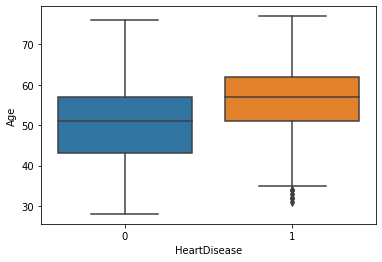

In [65]:
# Выведем в виде ящика с усами информацию по болезни сердца от возраста

sns.boxplot(data=temp, x="HeartDisease", y="Age")

> По графику можно определить, что примерно с 55 лет вероятность, основанная на дата сете, болезни сердца выше, чем до этого возраста.

In [66]:
# # Посчитаем и выведим корреляционную матрицу

# fig, ax = plt.subplots(figsize = (20,20))
# corr_matrix = temp.corr()
# sns.heatmap(corr_matrix, cmap = 'coolwarm', annot = True, fmt = '.2f')
# plt.title('Correlation Matrix for Heart Failure Prediction Dataset')
# plt.show()

# Сильной корреляции нет, вы водить ее не стоит для того что бы не испортить данные.

In [67]:
temp.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,132.396514,198.799564,0.233115,136.809368,0.404139,0.887364,0.553377,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,9.432617,0.407701,18.514154,109.384145,0.423046,25.460334,0.490992,1.066570,0.497414,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,28.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,1.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,1.000000,130.000000,223.000000,0.000000,138.000000,0.000000,0.600000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,60.000000,1.000000,140.000000,267.000000,0.000000,156.000000,1.000000,1.500000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,603.000000,1.000000,202.000000,1.000000,6.200000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [68]:
# Для улучшения работы алгоритмов модели проведем нормализацию данных для столбцов
# Но, сначала сделаю еще одну копию, что бы потом можно было сроавнить полученные данные моделей если нужно будет

temp1 = temp.copy()

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
temp1['Age'] = scaler.fit_transform(temp1[['Age']])
temp1['Cholesterol'] = scaler.fit_transform(temp1[['Cholesterol']])
temp1['MaxHR'] = scaler.fit_transform(temp1[['MaxHR']])
temp1['Oldpeak'] = scaler.fit_transform(temp1[['Oldpeak']])
temp1['RestingBP'] = scaler.fit_transform(temp1[['RestingBP']])

In [69]:
temp1.describe()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.520630,0.789760,0.661983,0.329684,0.233115,0.540911,0.404139,0.396291,0.553377,0.540305,0.188453,0.221133,0.050109,0.204793,0.601307,0.193900,0.068627,0.501089,0.430283
std,0.192502,0.407701,0.092571,0.181400,0.423046,0.179298,0.490992,0.121201,0.497414,0.498645,0.391287,0.415236,0.218289,0.403770,0.489896,0.395567,0.252957,0.500271,0.495386
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387755,1.000000,0.600000,0.287313,0.000000,0.422535,0.000000,0.295455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.530612,1.000000,0.650000,0.369818,0.000000,0.549296,0.000000,0.363636,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.653061,1.000000,0.700000,0.442786,0.000000,0.676056,1.000000,0.465909,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


> #### Разделяем на тренировочные и тестовые данные (согласно условию: 80% данных оставить на обучающее множество, 20% - на тестовое)

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X = temp1.drop(['HeartDisease'], axis = 1) 
y = temp1['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)


> #### Обучаем дерево решений на обучающем множестве
> Используем следующие модели:<br>
> a) tree.DecisionTreeClassifier<br>
> b) ensemble.RandomForestClassifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

> #### Модель DecisionTreeClassifier

In [73]:

dtc = DecisionTreeClassifier(random_state = 10, max_depth = 11, min_samples_split = 3, min_samples_leaf = 1)
dtc.fit(X_train, y_train)
dtc_score = dtc.score(X_train, y_train)
dtc_score

0.9768392370572208

In [74]:
dtc_score_t = dtc.score(X_test, y_test)
dtc_score_t

0.7554347826086957

In [75]:
y_pred = dtc.predict(X_test)

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74        86
           1       0.78      0.76      0.77        98

    accuracy                           0.76       184
   macro avg       0.75      0.76      0.75       184
weighted avg       0.76      0.76      0.76       184



In [77]:
# Выявляем наиболее важные признаки и выводим на график. 

imp = pd.Series(dtc.feature_importances_)

In [78]:
imp.index = pd.Series(X_train.columns)

In [79]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.418723
ChestPainType_ASY    0.117825
MaxHR                0.090438
Oldpeak              0.077863
RestingBP            0.073048
Cholesterol          0.063825
Age                  0.055885
Sex                  0.042978
FastingBS            0.029096
RestingECG_Normal    0.008595
ChestPainType_NAP    0.007739
ST_Slope_Flat        0.007531
ChestPainType_TA     0.004686
RestingECG_ST        0.001768
ExerciseAngina       0.000000
RestingECG_LVH       0.000000
ST_Slope_Down        0.000000
ChestPainType_ATA    0.000000
dtype: float64

Большое значение имеет признак ST_Slope_Up

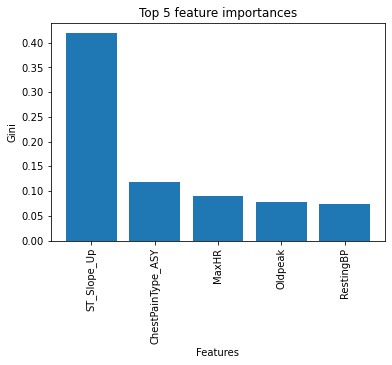

In [80]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.xticks(rotation=90)
plt.show()

> #### Модель RandomForestClassifier

In [81]:
# RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

In [82]:
rfc = RandomForestClassifier(n_estimators=100, random_state=0, max_depth = 11, min_samples_split = 3, min_samples_leaf = 1)
rfc.fit(X_train, y_train)
rfc_score = rfc.score(X_train, y_train)
rfc_score

0.989100817438692

In [83]:
rfc_score_t = rfc.score(X_test, y_test)
rfc_score_t

0.8532608695652174

In [84]:
y_pred = rfc.predict(X_test)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        86
           1       0.84      0.90      0.87        98

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [86]:
# Выявляем наиболее важные признаки и выводим на график. 

imp = pd.Series(rfc.feature_importances_)

In [87]:
imp.index = pd.Series(X_train.columns)

In [88]:
imp = imp.sort_values(ascending=False)
imp

ST_Slope_Up          0.160765
ST_Slope_Flat        0.111548
ChestPainType_ASY    0.104068
Oldpeak              0.100444
MaxHR                0.094272
Cholesterol          0.079375
ExerciseAngina       0.067464
RestingBP            0.067436
Age                  0.067309
Sex                  0.040019
ChestPainType_ATA    0.025430
FastingBS            0.020538
ChestPainType_NAP    0.017452
RestingECG_LVH       0.013956
RestingECG_Normal    0.009024
RestingECG_ST        0.007142
ST_Slope_Down        0.006891
ChestPainType_TA     0.006868
dtype: float64

Большое значение имеет признак ST_Slope_Up, но по отношению к остальным 4-м признакам уже разница не большая и значение этих признаков выше чем у первой модели. 

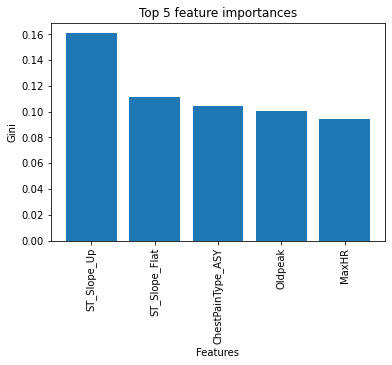

In [89]:
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.xticks(rotation=90)
plt.show()

> #### Методы сбора ансамблей Бэггинг
модель tree.DecisionTreeClassifier

In [90]:
from sklearn.ensemble import BaggingClassifier

In [91]:
bagging = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=100,
                           max_samples=0.5,
                           max_features=0.5,
                           random_state=10)


In [92]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, n_estimators=100, random_state=10)

In [93]:
bag_score = bagging.score(X_train, y_train)
bag_score

0.9700272479564033

In [94]:
bag_score_t = bagging.score(X_test, y_test)
bag_score_t

0.8369565217391305

In [95]:
y_pred = bagging.predict(X_test)

In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        86
           1       0.83      0.87      0.85        98

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.84       184
weighted avg       0.84      0.84      0.84       184



> #### Методы сбора ансамблей Стекинг *(ensemble.StackingClassifier)*
Модели:<br>
> a) tree.DecisionTreeClassifier <br>
> b) ensemble.RandomForestClassifier <br>
> с) svm.LinearSVC <br>


In [97]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeCV

In [98]:
Stacking = StackingClassifier(
    [
        ('DecisionTreeClassifier', DecisionTreeClassifier(random_state = 10, max_depth = 11, min_samples_split = 3, min_samples_leaf = 1)),
        ('RandomForestClassifier', RandomForestClassifier(n_estimators=100, random_state=10))
    ], final_estimator = LinearSVC())

In [99]:
Stacking.fit(X_train, y_train)

StackingClassifier(estimators=[('DecisionTreeClassifier',
                                DecisionTreeClassifier(max_depth=11,
                                                       min_samples_split=3,
                                                       random_state=10)),
                               ('RandomForestClassifier',
                                RandomForestClassifier(random_state=10))],
                   final_estimator=LinearSVC())

In [100]:
Stacking.score(X_train, y_train)

1.0

In [101]:
y_pred = Stacking.predict(X_test)

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        86
           1       0.85      0.87      0.86        98

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



In [103]:
print(f'Score on train  {Stacking.score(X_train, y_train)}')
print(f'Score on test  {Stacking.score(X_test, y_test)}')

Score on train  1.0
Score on test  0.8478260869565217


In [104]:
sc = []
for i in Stacking.named_estimators:
    print(f'Score on train  with model {i} {Stacking.named_estimators_[i].score(X_train, y_train)}')
    print(f'Score on test  with model {i} {Stacking.named_estimators_[i].score(X_test, y_test)}')
    sc.append(Stacking.named_estimators_[i].score(X_train, y_train))
    sc.append(Stacking.named_estimators_[i].score(X_test, y_test))

Score on train  with model DecisionTreeClassifier 0.9768392370572208
Score on test  with model DecisionTreeClassifier 0.7554347826086957
Score on train  with model RandomForestClassifier 1.0
Score on test  with model RandomForestClassifier 0.8586956521739131


In [105]:
from prettytable import PrettyTable

In [106]:
table = PrettyTable()
table.field_names = ["Методы сбора ансамблей", "Модель", "Score(X_train, y_train)", "Score(X_test, y_test", "Комментарий"]
table.add_row([" N/a ", "DecisionTreeClassifier", round(dtc_score, 4), round(dtc_score_t, 4), "В целом модель обучилась не плохо, тестовая оценка ниже других" ])
table.add_row(["N/a ", "RandomForestClassifier",round(rfc_score, 4), round(rfc_score_t, 4),  "Лучшее обучение модели"])
table.add_row(["BaggingClassifier","DecisionTreeClassifier"  , round(bag_score, 4), round(bag_score_t, 4), "Не смотря на то что оценка обучения ниже других, тестовая средняя"])
table.add_row(["StackingClassifier","DecisionTreeClassifier", round(sc[0], 4), round(sc[1], 4), "В целом модель обучилась не плохо, тестовая оценка ниже других"])
table.add_row(["StackingClassifier","RandomForestClassifier", round(sc[2], 4), round(sc[3], 4), "Модель переобучилась"])
table.align["Комментарий"] = "l"
table.valign = "m"
print(table.get_string())

+------------------------+------------------------+-------------------------+----------------------+-------------------------------------------------------------------+
| Методы сбора ансамблей |         Модель         | Score(X_train, y_train) | Score(X_test, y_test | Комментарий                                                       |
+------------------------+------------------------+-------------------------+----------------------+-------------------------------------------------------------------+
|          N/a           | DecisionTreeClassifier |          0.9768         |        0.7554        | В целом модель обучилась не плохо, тестовая оценка ниже других    |
|          N/a           | RandomForestClassifier |          0.9891         |        0.8533        | Лучшее обучение модели                                            |
|   BaggingClassifier    | DecisionTreeClassifier |           0.97          |        0.837         | Не смотря на то что оценка обучения ниже других, тесто

> **Вывод:**<br>
Из всех моделей у меня обучилась лучше всего RandomForestClassifier, без Ансамбля. 
По моему мнению, данных не достаточно для обучения, а так же много показателей, которые вероятно повлияли на результат.